Positive Word Frequency


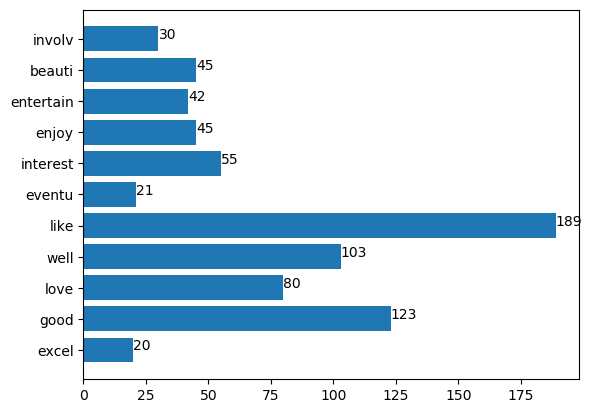

Negative Word Frequency


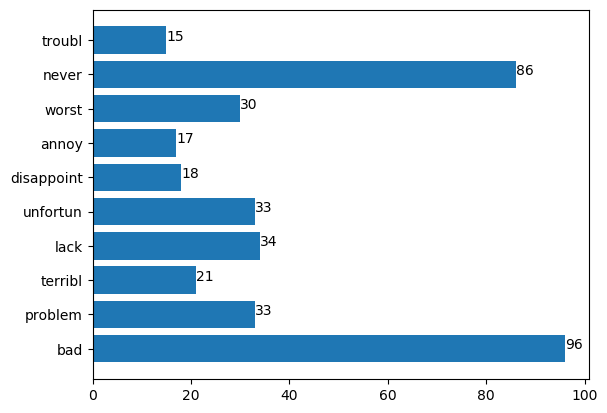

Positive WordCloud


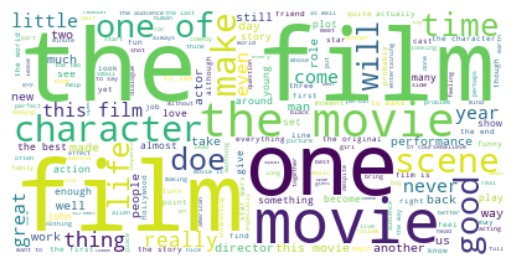

Negative WordCloud


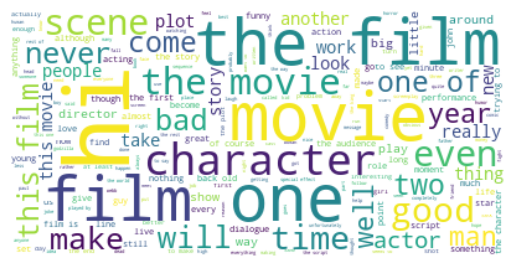

In [3]:
import collections
import math
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import seaborn as sb
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
stop_words = list(stopwords.words('english'))
ps=PorterStemmer()
punctuations = '''``...|!()=-[]{};'':—’”“\,<>./?@#$%^&*_~'''


trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")


def reusableCode(positive_dataset,negative_dataset):
    positive=[]
    negative=[]
    for index,row in positive_dataset.iterrows():
            review = row['Content']
            positive.append(review)

    for index,row in negative_dataset.iterrows():
            review = row['Content']
            negative.append(review)

    Total_positive=''
    Total_negative=''

    for doc in positive:
        Total_positive=Total_positive+' '+doc
    for doc in negative:
        Total_negative=Total_negative+' '+doc
    Tokens_positive=word_tokenize(Total_positive)
    Tokens_negative=word_tokenize(Total_negative)
    query_positive="excellent good loved well like eventually interesting enjoyed entertaining beautifully involving"
    query_negative='bad problem terrible lack unfortunately disappointed annoying worst never trouble'
    query_tokens_positive = word_tokenize(query_positive)
    query_tokens_negative = word_tokenize(query_negative)
    filtered_Tokens_positive=[]
    filtered_Tokens_negative=[]
    query_newTokens_positive=[]
    query_newTokens_negative=[]
    for w in Tokens_positive: 
        rootword=ps.stem(w)
        if rootword not in stop_words: 
            word=rootword
            if word not in punctuations:
                filtered_Tokens_positive.append(word.lower())
    for w in Tokens_negative: 
        rootword=ps.stem(w)
        if rootword not in stop_words: 
            word=rootword
            if word not in punctuations:
                filtered_Tokens_negative.append(word.lower())
    counts_positive=Counter(filtered_Tokens_positive)
    counts_negative=Counter(filtered_Tokens_negative)
    for w in query_tokens_positive:
        query_root=ps.stem(w)
        query_newTokens_positive.append(query_root)
    for w1 in query_tokens_negative:
        query_root=ps.stem(w1)
        query_newTokens_negative.append(query_root)
    term_frequency_positive=[]
    term_frequency_negative=[]
    for word in query_newTokens_positive:
        term_frequency_positive.append(counts_positive[word])
    for word in query_newTokens_negative:
        term_frequency_negative.append(counts_negative[word])
    print('Positive Word Frequency')
    plt.barh(query_newTokens_positive, term_frequency_positive) 
    for index, value in enumerate(term_frequency_positive):
        plt.text(value,index, (value))
    plt.show()
    print('Negative Word Frequency')
    plt2=plt.barh(query_newTokens_negative, term_frequency_negative) 
    for index, value in enumerate(term_frequency_negative):
        plt.text(value,index, str(value))
    plt.show()
    print('Positive WordCloud')
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(Total_positive)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('Negative WordCloud')
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(Total_negative)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


positive_dataset=testData.loc[testData['Label']=='pos']
negative_dataset=testData.loc[testData['Label']=='neg']

reusableCode(positive_dataset,negative_dataset)

In [4]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(trainData['Content'])
test_vectors = vectorizer.transform(testData['Content'])
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, trainData['Label'])
prediction_linear = classifier_linear.predict(test_vectors)
report_linear = classification_report(testData['Label'], prediction_linear, output_dict=True)
print('SVM_Linear Report: ')
print(report_linear)
for index,row in testData.iterrows():
    review = row['Content'] 
    review_vector = vectorizer.transform([review])
    if classifier_linear.predict(review_vector) == 'pos':
        testData.at[index, 'SVM_Linear']='pos'
    else:
        testData.at[index, 'SVM_Linear']='neg'
testData.head()

SVM_Linear Report: 
{'neg': {'precision': 0.9108910891089109, 'recall': 0.92, 'f1-score': 0.9154228855721394, 'support': 100}, 'pos': {'precision': 0.9191919191919192, 'recall': 0.91, 'f1-score': 0.9145728643216081, 'support': 100}, 'accuracy': 0.915, 'macro avg': {'precision': 0.9150415041504151, 'recall': 0.915, 'f1-score': 0.9149978749468737, 'support': 200}, 'weighted avg': {'precision': 0.9150415041504151, 'recall': 0.915, 'f1-score': 0.9149978749468738, 'support': 200}}


,Unnamed: 0,Content,Label,SVM_Linear
0,0,hedwig ( john cameron mitchell ) was born a bo...,pos,pos
1,1,one of the more unusual and suggestively viole...,pos,pos
2,2,what do you get when you combine clueless and ...,pos,neg
3,3,>from the man who presented us with henry : th...,pos,pos
4,4,tibet has entered the american consciousness s...,pos,pos


In [5]:
classifier_RBF = svm.SVC(C=1000, kernel='rbf', degree=3, gamma=0.1)
classifier_RBF.fit(train_vectors, trainData['Label'])
prediction_RBF = classifier_RBF.predict(test_vectors)
report_RBF = classification_report(testData['Label'], prediction_RBF, output_dict=True)
print('SVM_RBF Report: ')
print(report_RBF)
for index,row in testData.iterrows():
    review = row['Content'] 
    review_vector = vectorizer.transform([review])
    if classifier_RBF.predict(review_vector) == 'pos':
        testData.at[index, 'SVM_RBF']='pos'
    else:
        testData.at[index, 'SVM_RBF']='neg'
testData.head()


SVM_RBF Report: 
{'neg': {'precision': 0.91, 'recall': 0.91, 'f1-score': 0.91, 'support': 100}, 'pos': {'precision': 0.91, 'recall': 0.91, 'f1-score': 0.91, 'support': 100}, 'accuracy': 0.91, 'macro avg': {'precision': 0.91, 'recall': 0.91, 'f1-score': 0.91, 'support': 200}, 'weighted avg': {'precision': 0.91, 'recall': 0.91, 'f1-score': 0.91, 'support': 200}}


,Unnamed: 0,Content,Label,SVM_Linear,SVM_RBF
0,0,hedwig ( john cameron mitchell ) was born a bo...,pos,pos,pos
1,1,one of the more unusual and suggestively viole...,pos,pos,pos
2,2,what do you get when you combine clueless and ...,pos,neg,neg
3,3,>from the man who presented us with henry : th...,pos,pos,pos
4,4,tibet has entered the american consciousness s...,pos,pos,pos


Positive Word Frequency


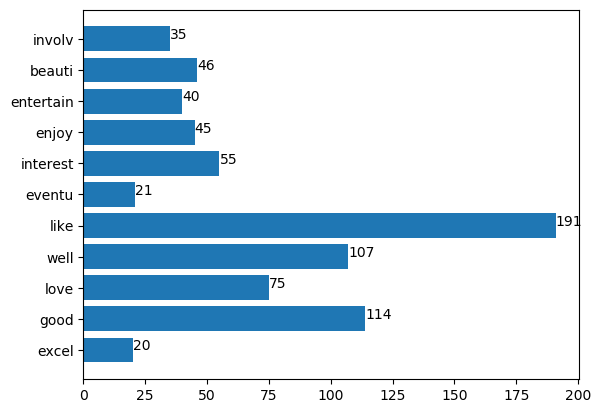

Negative Word Frequency


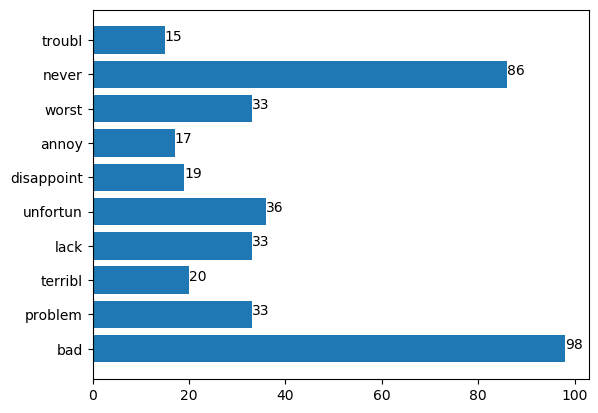

Positive WordCloud


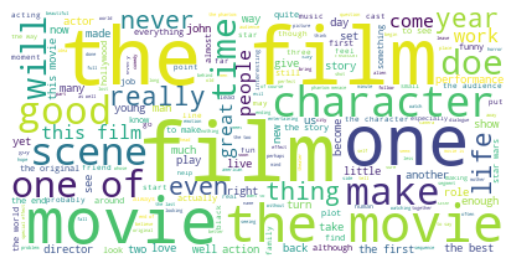

Negative WordCloud


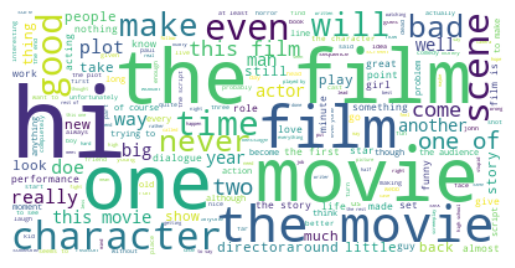

In [6]:
positive_dataset_SVMLinear=testData.loc[testData['SVM_Linear']=='pos']
negative_dataset_SVMLinear=testData.loc[testData['SVM_Linear']=='neg']

reusableCode(positive_dataset_SVMLinear,negative_dataset_SVMLinear)

Positive Word Frequency


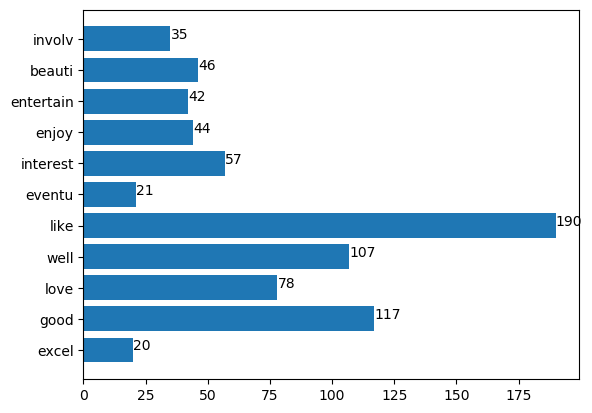

Negative Word Frequency


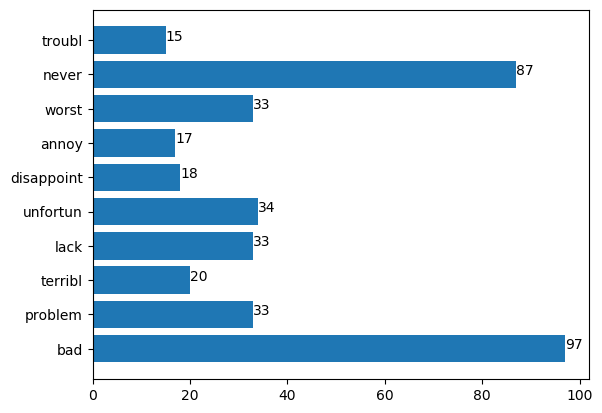

Positive WordCloud


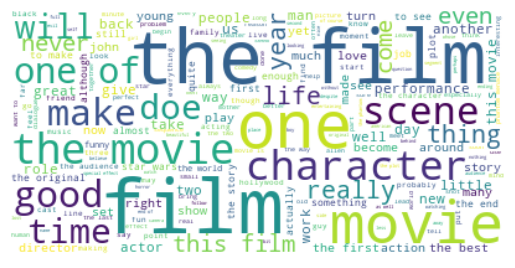

Negative WordCloud


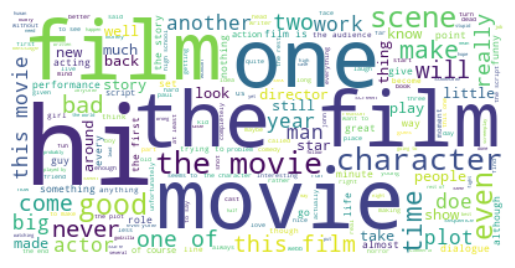

In [7]:
positive_dataset_SVMRBF=testData.loc[testData['SVM_RBF']=='pos']
negative_dataset_SVMRBF=testData.loc[testData['SVM_RBF']=='neg']

reusableCode(positive_dataset_SVMRBF,negative_dataset_SVMRBF)

In [8]:
def confusionMatrix(kernel): 
    #calculating precision Recall F measure for positive class
    a,b,c,d=0,0,0,0
    for index,row in testData.iterrows():
        if row['Label']=='pos' and row[kernel] == 'pos':
            a+=1
        if row['Label']=='pos' and row[kernel] == 'neg':
            b+=1
        if row['Label']=='neg' and row[kernel] == 'pos':
            c+=1
        if row['Label']=='neg' and row[kernel] == 'neg':
            d+=1
    print('For positive class:')
    print(a,b,c,d)
    precision=a/(a+c)
    recall=a/(a+b)
    Fmeasure=2*a/(2*a+b+c)
    Accuracy=(a+d)/(a+b+c+d)
    print('Precision:',precision)
    print('Recall:',recall)
    print('F-measure:',Fmeasure)
    print('Accuracy:',Accuracy)
        
    #calculating precision Recall F measure for negative class
    a,b,c,d=0,0,0,0
    for index,row in testData.iterrows():
        if row['Label']=='neg' and row[kernel] == 'neg':
            a+=1
        if row['Label']=='neg' and row[kernel] == 'pos':
            b+=1
        if row['Label']=='pos' and row[kernel] == 'neg':
            c+=1
        if row['Label']=='pos' and row[kernel] == 'pos':
            d+=1
    print('For negative class')
    print(a,b,c,d)
    precision=a/(a+c)
    recall=a/(a+b)
    Fmeasure=2*a/(2*a+b+c)
    Accuracy=(a+d)/(a+b+c+d)
    print('Precision:',precision)
    print('Recall:',recall)
    print('F-measure:',Fmeasure)
    print('Accuracy:',Accuracy)

In [9]:
print('Linear Kernel')
confusionMatrix('SVM_Linear')

Linear Kernel
For positive class:
91 9 8 92
Precision: 0.9191919191919192
Recall: 0.91
F-measure: 0.914572864321608
Accuracy: 0.915
For negative class
92 8 9 91
Precision: 0.9108910891089109
Recall: 0.92
F-measure: 0.9154228855721394
Accuracy: 0.915


In [10]:
print('RBF Kernel')
confusionMatrix('SVM_RBF')

RBF Kernel
For positive class:
91 9 9 91
Precision: 0.91
Recall: 0.91
F-measure: 0.91
Accuracy: 0.91
For negative class
91 9 9 91
Precision: 0.91
Recall: 0.91
F-measure: 0.91
Accuracy: 0.91
